# Proyecto final: módulo de deep learning

## Descarga de datos e imágenes

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lizettemartinez","key":"ce6ecdd1e0726bacc27f1a3dcae32e5d"}'}

Se crea un directorio oculto .kaggle en el home directory del entorno de Google Colab.

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           7353        137  1.0              
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-14 19:10:56            108        346  1.0              
rashadrmammadov/heart-disease-prediction                             Heart Disease prediction                          16KB  2024-06-12 07:29:56            854         24  1.0              
monisamir/global-salary-analysis                  

In [ ]:
! kaggle datasets download stevezhenghp/airbnb-price-prediction

Dataset URL: https://www.kaggle.com/datasets/stevezhenghp/airbnb-price-prediction
License(s): unknown
 80% 25.0M/31.3M [00:00<00:00, 115MB/s] 
100% 31.3M/31.3M [00:00<00:00, 117MB/s]


In [ ]:
! unzip airbnb-price-predictionn

unzip:  cannot find or open airbnb-price-predictionn, airbnb-price-predictionn.zip or airbnb-price-predictionn.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Asegúrate de actualizar la ruta según la ubicación exacta del archivo en tu Google Drive
path = '/content/drive/My Drive/Colab Deep/train.csv'
data = pd.read_csv(path)

# Muestra las primeras filas para verificar que los datos se han cargado correctamente
print(data.head())


         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

# Organizando datos

In [ ]:

import pandas as pd

# Mostrar las primeras filas del DataFrame para obtener una visión preliminar de los datos
print(data.head())

         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed     

In [ ]:
# Mostrar un resumen estadístico de las variables numéricas
print(data.describe())

                 id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.

In [ ]:
# Mostrar información sobre los tipos de datos y los valores faltantes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
# Calcula y muestra el número de valores faltantes por columna
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


In [ ]:
data_complete = data.dropna()

In [ ]:
print("Número de filas completas:", data_complete.shape[0])

Número de filas completas: 38502


In [ ]:
print(data_complete.head())

         id  log_price property_type        room_type  \
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
5  12422935   4.442651     Apartment     Private room   
7  13971273   4.787492   Condominium  Entire home/apt   
8    180792   4.787492         House     Private room   

                                           amenities  accommodates  bathrooms  \
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
5  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   
7  {TV,"Cable TV","Wireless Internet","Wheelchair...             2        1.0   
8  {TV,"Cable TV","Wireless Internet","Pets live ...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed     

In [ ]:
# Calcula y muestra el número de valores faltantes por columna
missing_values_2 = data_complete.isnull().sum()
print(missing_values_2[missing_values_2 > 0])

Series([], dtype: int64)


In [ ]:
# Exportar a Excel
data_complete.to_excel("/content/drive/My Drive/Colab Deep//data_complete.xlsx", index=False)

# Desarrollo de Scraping


In [ ]:
import requests
from PIL import Image
from io import BytesIO
import os

def download_image(url, filename, directory="/content/drive/My Drive/Colab Deep/images/"):
    # Crear el directorio si no existe
    if not os.path.exists(directory):
        os.makedirs(directory)

    path = os.path.join(directory, filename)

    # Verificar si el archivo ya existe
    if os.path.exists(path):
        print(f"Imagen ya existe: {path}")
        return True

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Verificar que la respuesta sea exitosa
        image = Image.open(BytesIO(response.content))
        image.save(path)
        print(f"Imagen guardada: {path}")
        return True
    except Exception as e:
        print(f"Error al descargar {url}: {e}")
        return False

# Función para no volver a descargar imágenes existentes
data_complete = pd.read_excel("/content/drive/My Drive/Colab Deep/data_complete.xlsx")
success_count = 0
failed_urls = []

for index, row in data_complete.iterrows():
    if success_count >= 2000:
        break
    result = download_image(row['thumbnail_url'], f"image_{index}.jpg")
    if not result:
        failed_urls.append(row['thumbnail_url'])
    else:
        success_count += 1

print(f"Descargadas {success_count} imágenes exitosamente.")
if failed_urls:
    print("Algunas imágenes fallaron al descargar:")
    for url in failed_urls:
        print(url)



Imagen ya existe: /content/drive/My Drive/Colab Deep/images/image_0.jpg
Error al descargar https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small: 404 Client Error: Not Found for url: https://a0.muscache.com/im/pictures/6fae5362-9e3a-4fa9-aa54-bbd5ea26538d.jpg?aki_policy=small
Imagen ya existe: /content/drive/My Drive/Colab Deep/images/image_2.jpg
Imagen ya existe: /content/drive/My Drive/Colab Deep/images/image_3.jpg
Imagen ya existe: /content/drive/My Drive/Colab Deep/images/image_4.jpg
Imagen ya existe: /content/drive/My Drive/Colab Deep/images/image_5.jpg
Imagen ya existe: /content/drive/My Drive/Colab Deep/images/image_6.jpg
Error al descargar https://a0.muscache.com/im/pictures/e9baba99-e67a-413c-9986-9386f8c5fa2f.jpg?aki_policy=small: 404 Client Error: Not Found for url: https://a0.muscache.com/im/pictures/e9baba99-e67a-413c-9986-9386f8c5fa2f.jpg?aki_policy=small
Imagen ya existe: /content/drive/My Drive/Colab Deep/images/image_8.jpg
Imagen

In [ ]:
import pandas as pd

# Asegúrate de que estás usando la ruta correcta al archivo original
data_complete = pd.read_excel("/content/drive/My Drive/Colab Deep/data_complete.xlsx")
print("Número total de filas en el DataFrame después de la carga:", len(data_complete))


Número total de filas en el DataFrame después de la carga: 38502


In [ ]:
import os

# Lista para almacenar las rutas de las imágenes
image_paths = []

# Ajusta según tu ruta de imagen
image_folder = "/content/drive/My Drive/Colab Deep/images/"

# Generar rutas de imágenes basadas en el índice del DataFrame
for idx in data_complete.index:
    image_path = os.path.join(image_folder, f"image_{idx}.jpg")
    if os.path.exists(image_path):
        image_paths.append(image_path)
    else:
        image_paths.append(None)

# Crear una columna en el DataFrame con las rutas de las imágenes
data_complete['image_path'] = image_paths

# Eliminar filas donde la imagen no existe
data_complete = data_complete.dropna(subset=['image_path'])

# Verificar el número de filas después de la limpieza
print("Total de entradas en el DataFrame después de la limpieza:", len(data_complete))


Total de entradas en el DataFrame después de la limpieza: 2000


In [ ]:
# Verificar algunas rutas generadas
for img_path in data_complete['image_path'].head(10):
    print(f"Ruta de la imagen: {img_path} - Existe: {os.path.exists(img_path) if img_path else 'No existe'}")


Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_0.jpg - Existe: True
Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_2.jpg - Existe: True
Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_3.jpg - Existe: True
Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_4.jpg - Existe: True
Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_5.jpg - Existe: True
Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_6.jpg - Existe: True
Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_8.jpg - Existe: True
Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_9.jpg - Existe: True
Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_10.jpg - Existe: True
Ruta de la imagen: /content/drive/My Drive/Colab Deep/images/image_11.jpg - Existe: True


In [ ]:
# Verificar el número de imágenes existentes en el DataFrame final
num_images_existing = sum(data_complete['image_path'].apply(lambda x: os.path.exists(x) if x else False))
print("Número de imágenes existentes en el DataFrame final:", num_images_existing)


Número de imágenes existentes en el DataFrame final: 2000


In [ ]:
print("Total de entradas en el DataFrame después de la limpieza:", len(data_complete))

Total de entradas en el DataFrame después de la limpieza: 2000


In [ ]:
# Verificar el número total de entradas en el DataFrame después de la limpieza
print("Total de entradas en el DataFrame después de la limpieza:", len(data_complete))

# Verificar el número de imágenes existentes en el DataFrame final
num_images_existing = sum(data_complete['image_path'].apply(lambda x: os.path.exists(x) if x else False))
print("Número de imágenes existentes en el DataFrame final:", num_images_existing)


Total de entradas en el DataFrame después de la limpieza: 2000
Número de imágenes existentes en el DataFrame final: 2000


# Configuración del Entorno

In [ ]:
# Configuración del entorno
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, concatenate, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os


In [ ]:
# Preparación de los datos tabulares
data = pd.read_excel("/content/drive/My Drive/Colab Deep/data_complete.xlsx")

# Selección de características relevantes y preprocesamiento
features = data[['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating']]
features = pd.get_dummies(features, columns=['property_type', 'room_type'])
features = features.fillna(features.mean())

# División de los datos en conjuntos de entrenamiento y prueba
X_train_tab, X_test_tab, y_train, y_test = train_test_split(features, data['log_price'], test_size=0.2, random_state=42)

print("Datos tabulares preparados.")



Datos tabulares preparados.


In [ ]:
# Ruta a las imágenes ya descargadas
image_folder = "/content/drive/My Drive/Colab Deep/images/"

# Función para cargar y procesar imágenes
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalizar las imágenes
    return image

# Crear un DataFrame con los paths de las imágenes
data['image_path'] = image_folder + 'image_' + data.index.astype(str) + '.jpg'
data = data.dropna(subset=['image_path'])

# Verificar que todas las imágenes existen
data = data[data['image_path'].apply(lambda path: os.path.exists(path))]

# Cargar las imágenes
X_images = np.array([load_and_preprocess_image(path) for path in data['image_path']])

# División de los datos de imágenes en conjuntos de entrenamiento y prueba
X_train_img, X_test_img = train_test_split(X_images, test_size=0.2, random_state=42)

print("Datos de imágenes preparados.")


Datos de imágenes preparados.


In [ ]:
from tensorflow.keras.initializers import RandomNormal

# Definir el input para los datos tabulares
input_tabular = Input(shape=(X_train_tab.shape[1],), name='tabular_input')

# Crear una red neuronal profunda para los datos tabulares
x = Dense(200, activation='relu', kernel_initializer=RandomNormal(stddev=0.01))(input_tabular)
x = Dropout(0.3)(x)
x = Dense(100, activation='relu', kernel_initializer=RandomNormal(stddev=0.01))(x)
x = Dropout(0.3)(x)
x = Dense(60, activation='relu', kernel_initializer=RandomNormal(stddev=0.01))(x)
x = Dropout(0.3)(x)
x = Dense(30, activation='relu', kernel_initializer=RandomNormal(stddev=0.01))(x)
model_tabular = Model(inputs=input_tabular, outputs=x)

print("Modelo tabular definido.")


Modelo tabular definido.


In [ ]:
# Usar un modelo pre-entrenado como base para la parte de imágenes
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Añadir capas adicionales
input_image = Input(shape=(224, 224, 3), name='image_input')
y = base_model(input_image, training=False)
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = Dense(200, activation='relu', kernel_initializer=RandomNormal(stddev=0.01))(y)
y = Dropout(0.3)(y)
y = Dense(100, activation='relu', kernel_initializer=RandomNormal(stddev=0.01))(y)
y = Dropout(0.3)(y)
y = Dense(60, activation='relu', kernel_initializer=RandomNormal(stddev=0.01))(y)
y = Dropout(0.3)(y)
model_image = Model(inputs=input_image, outputs=y)

print("Modelo de imágenes definido.")


94765736/94765736 [==============================] - 0s 0us/step
Modelo de imágenes definido.


In [ ]:
# Combinar las salidas de ambos modelos
combined = concatenate([model_tabular.output, model_image.output])

# Añadir capas densas finales
z = Dense(64, activation='relu', kernel_initializer=RandomNormal(stddev=0.01))(combined)
z = Dropout(0.3)(z)
z = Dense(1, activation='linear')(z)  # Salida de regresión para predecir el precio

# Definir el modelo final combinando ambos inputs
model = Model(inputs=[model_tabular.input, model_image.input], outputs=z)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Modelos combinados y compilados.")


Modelos combinados y compilados.


In [ ]:
print("Tamaño de X_train_tab:", X_train_tab.shape)
print("Tamaño de X_train_img:", X_train_img.shape)
print("Tamaño de y_train:", y_train.shape)

print("Tamaño de X_test_tab:", X_test_tab.shape)
print("Tamaño de X_test_img:", X_test_img.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train_tab: (30801, 43)
Tamaño de X_train_img: (1600, 224, 224, 3)
Tamaño de y_train: (30801,)
Tamaño de X_test_tab: (7701, 43)
Tamaño de X_test_img: (400, 224, 224, 3)
Tamaño de y_test: (7701,)


In [ ]:
# Filtrar para tener solo 2000 imágenes coincidentes
data = data.iloc[:2000]

# Cargar las imágenes
X_images = np.array([load_and_preprocess_image(path) for path in data['image_path']])

# Actualizar los datos tabulares para que coincidan con las imágenes
features = data[['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating']]
features = pd.get_dummies(features, columns=['property_type', 'room_type'])
features = features.fillna(features.mean())

# Verificar el tamaño de los datos tabulares y de imágenes
print("Tamaño de los datos tabulares:", features.shape)
print("Tamaño de las imágenes:", X_images.shape)

# División de los datos en conjuntos de entrenamiento y prueba
X_train_tab, X_test_tab, X_train_img, X_test_img, y_train, y_test = train_test_split(features, X_images, data['log_price'], test_size=0.2, random_state=42)

print("Tamaño de X_train_tab:", X_train_tab.shape)
print("Tamaño de X_train_img:", X_train_img.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test_tab:", X_test_tab.shape)
print("Tamaño de X_test_img:", X_test_img.shape)
print("Tamaño de y_test:", y_test.shape)

print("Datos tabulares e imágenes preparados.")


Tamaño de los datos tabulares: (2000, 31)
Tamaño de las imágenes: (2000, 224, 224, 3)
Tamaño de X_train_tab: (1600, 31)
Tamaño de X_train_img: (1600, 224, 224, 3)
Tamaño de y_train: (1600,)
Tamaño de X_test_tab: (400, 31)
Tamaño de X_test_img: (400, 224, 224, 3)
Tamaño de y_test: (400,)
Datos tabulares e imágenes preparados.


In [ ]:
# Convertir todas las columnas de los DataFrames a float32
X_train_tab = X_train_tab.astype('float32')
X_test_tab = X_test_tab.astype('float32')

# Convertir los arrays de imágenes a float32
X_train_img = X_train_img.astype('float32')
X_test_img = X_test_img.astype('float32')

# Convertir los arrays de etiquetas a float32
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Verificar los tipos de datos de las columnas de los DataFrames
print("Tipos de datos de las columnas de X_train_tab:", X_train_tab.dtypes)
print("Tipos de datos de las columnas de X_test_tab:", X_test_tab.dtypes)

# Verificar los tipos de datos de los arrays de imágenes y etiquetas
print("Tipo de datos de X_train_img:", X_train_img.dtype)
print("Tipo de datos de X_test_img:", X_test_img.dtype)
print("Tipo de datos de y_train:", y_train.dtype)
print("Tipo de datos de y_test:", y_test.dtype)


Tipos de datos de las columnas de X_train_tab: log_price                        float32
accommodates                     float32
bathrooms                        float32
bedrooms                         float32
beds                             float32
latitude                         float32
longitude                        float32
number_of_reviews                float32
review_scores_rating             float32
property_type_Apartment          float32
property_type_Bed & Breakfast    float32
property_type_Boat               float32
property_type_Boutique hotel     float32
property_type_Bungalow           float32
property_type_Cabin              float32
property_type_Castle             float32
property_type_Condominium        float32
property_type_Dorm               float32
property_type_Guest suite        float32
property_type_Guesthouse         float32
property_type_Hostel             float32
property_type_House              float32
property_type_In-law             float32
property_t

In [ ]:
# Definir el modelo tabular
input_tab = Input(shape=(X_train_tab.shape[1],))
x = Dense(64, activation='relu')(input_tab)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Model(inputs=input_tab, outputs=x)

# Definir el modelo de imágenes
input_img = Input(shape=(224, 224, 3))
y = ResNet50(weights='imagenet', include_top=False, input_tensor=input_img)
y = Flatten()(y.output)
y = Dense(512, activation='relu')(y)
y = Dropout(0.5)(y)
y = Dense(128, activation='relu')(y)
y = Model(inputs=input_img, outputs=y)

# Combinar ambos modelos
combined = concatenate([x.output, y.output])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.5)(z)
z = Dense(1)(z)

model = Model(inputs=[x.input, y.input], outputs=z)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(
    [X_train_tab, X_train_img], y_train,
    validation_data=([X_test_tab, X_test_img], y_test),
    epochs=50,
    batch_size=32
)

# Guardar el modelo entrenado
model.save("/content/drive/My Drive/Colab Deep/airbnb_price_prediction_model.h5")

print("Modelo entrenado y guardado.")


Epoch 1/50
50/50 [==============================] - 58s 408ms/step - loss: 77.8756 - val_loss: 57390.4102
Epoch 2/50
50/50 [==============================] - 18s 370ms/step - loss: 9.6828 - val_loss: 8.3502
Epoch 3/50
50/50 [==============================] - 19s 376ms/step - loss: 6.0113 - val_loss: 4.9554
Epoch 4/50
50/50 [==============================] - 18s 367ms/step - loss: 4.0699 - val_loss: 6.5716
Epoch 5/50
50/50 [==============================] - 18s 363ms/step - loss: 3.2903 - val_loss: 8.6247
Epoch 6/50
50/50 [==============================] - 18s 365ms/step - loss: 2.6703 - val_loss: 10.0015
Epoch 7/50
50/50 [==============================] - 18s 369ms/step - loss: 2.4092 - val_loss: 11.1864
Epoch 8/50
50/50 [==============================] - 18s 369ms/step - loss: 2.2650 - val_loss: 9.5327
Epoch 9/50
50/50 [==============================] - 18s 367ms/step - loss: 2.1397 - val_loss: 10.7854
Epoch 10/50
50/50 [==============================] - 18s 366ms/step - loss: 2.1077 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo entrenado y guardado.


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss = model.evaluate([X_test_tab, X_test_img], y_test)
print(f"Test loss: {test_loss}")


13/13 [==============================] - 1s 93ms/step - loss: 2.2989
Test loss: 2.298872947692871


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

In [ ]:
i# Definir el modelo tabular
input_tab = Input(shape=(X_train_tab.shape[1],))
x = Dense(64, activation='relu')(input_tab)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1)(x)
model_tab = Model(inputs=input_tab, outputs=x)


In [ ]:
# Redefinir el modelo de imágenes con regularización L2 y GlobalAveragePooling
input_img = Input(shape=(224, 224, 3))
y = ResNet50(weights='imagenet', include_top=False, input_tensor=input_img)
y = GlobalAveragePooling2D()(y.output)
y = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(y)
y = Dropout(0.5)(y)
y = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(y)
y = Dropout(0.5)(y)
y = Dense(1)(y)
model_img = Model(inputs=input_img, outputs=y)



In [ ]:
# Combinar ambos modelos
combined = concatenate([model_tab.output, model_img.output])
z = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(combined)
z = Dropout(0.5)(z)
z = Dense(1, activation='linear')(z)

In [ ]:
model = Model(inputs=[model_tab.input, model_img.input], outputs=z)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Entrenar el modelo
history = model.fit(
    [X_train_tab, X_train_img], y_train,
    validation_data=([X_test_tab, X_test_img], y_test),
    epochs=50,
    batch_size=32
)

# Guardar el modelo entrenado
model.save("/content/drive/My Drive/Colab Deep/airbnb_price_prediction_model_v2.h5")

print("Modelo entrenado y guardado con regularización y ajustes.")


Epoch 1/50
50/50 [==============================] - 47s 387ms/step - loss: 24.1698 - mae: 3.1356 - val_loss: 2938.1392 - val_mae: 54.1409
Epoch 2/50
50/50 [==============================] - 18s 365ms/step - loss: 12.1093 - mae: 2.0580 - val_loss: 60354.4414 - val_mae: 245.6474
Epoch 3/50
50/50 [==============================] - 18s 355ms/step - loss: 7.8602 - mae: 1.6426 - val_loss: 739.2726 - val_mae: 27.1187
Epoch 4/50
50/50 [==============================] - 17s 349ms/step - loss: 5.9293 - mae: 1.4014 - val_loss: 6.1763 - val_mae: 1.8722
Epoch 5/50
50/50 [==============================] - 17s 349ms/step - loss: 4.8972 - mae: 1.3601 - val_loss: 8.6168 - val_mae: 2.5409
Epoch 6/50
50/50 [==============================] - 18s 354ms/step - loss: 3.7676 - mae: 1.1749 - val_loss: 6.3778 - val_mae: 2.1392
Epoch 7/50
50/50 [==============================] - 18s 355ms/step - loss: 3.4822 - mae: 1.1627 - val_loss: 2.8770 - val_mae: 1.1686
Epoch 8/50
50/50 [==============================] - 18

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo entrenado y guardado con regularización y ajustes.


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate([X_test_tab, X_test_img], y_test)
print(f"Test loss: {test_loss}")
print(f"Test MAE: {test_mae}")


13/13 [==============================] - 1s 93ms/step - loss: 0.5796 - mae: 0.5405
Test loss: 0.5795683264732361
Test MAE: 0.5405374765396118


In [ ]:
import numpy as np

# Asegurarse de que y_test sea un array de NumPy
if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame):
    y_test = y_test.values

# Realizar predicciones
y_pred = model.predict([X_test_tab, X_test_img])

# Comparar algunas predicciones con los valores reales
for i in range(10):
    print(f"Predicción: {y_pred[i][0]}, Real: {y_test[i]}")


13/13 [==============================] - 1s 98ms/step
Predicción: 4.854238033294678, Real: 4.691348075866699
Predicción: 4.431557655334473, Real: 4.204692840576172
Predicción: 4.645884037017822, Real: 4.369447708129883
Predicción: 4.506247520446777, Real: 4.787491798400879
Predicción: 4.866361618041992, Real: 5.9427995681762695
Predicción: 4.598649978637695, Real: 5.556828022003174
Predicción: 4.80894660949707, Real: 5.0106353759765625
Predicción: 4.362955570220947, Real: 4.276666164398193
Predicción: 3.982975721359253, Real: 4.219507694244385
Predicción: 4.323063850402832, Real: 4.553876876831055


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.5405374765396118
Mean Squared Error (MSE): 0.5143344402313232
R-squared (R²): -0.22128818059977817


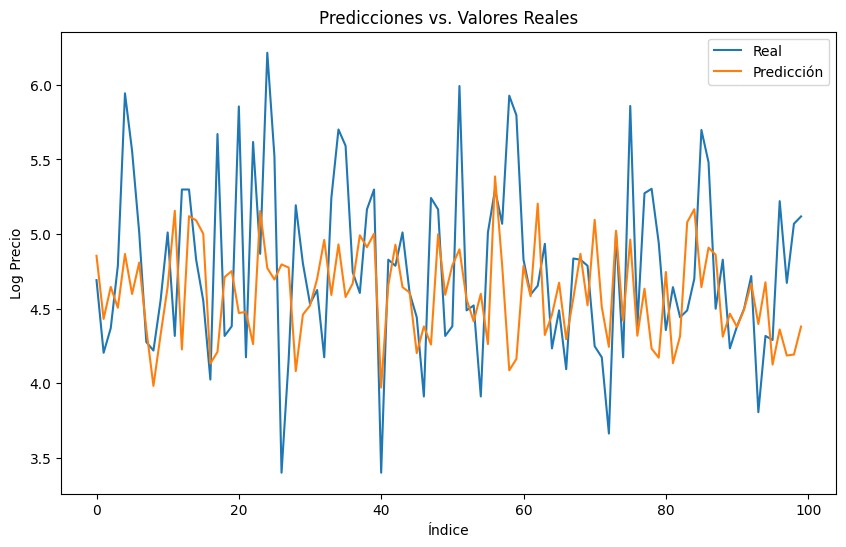

In [ ]:
import matplotlib.pyplot as plt

# Graficar las primeras 100 predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Real')
plt.plot(y_pred[:100], label='Predicción')
plt.legend()
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Log Precio')
plt.show()


In [ ]:
# Cargar el modelo guardado
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/My Drive/Colab Deep/airbnb_price_prediction_model.h5')

# Verificar que las predicciones con el modelo cargado sean correctas
y_pred_loaded = loaded_model.predict([X_test_tab, X_test_img])
print(f"Predicción con el modelo cargado: {y_pred_loaded[0][0]}")


13/13 [==============================] - 2s 97ms/step
Predicción con el modelo cargado: 3.3544363975524902


In [ ]:
!pip install tensorflow scikit-learn


In [ ]:
!pip install keras-tuner


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Input, concatenate, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch




In [ ]:
def build_model(hp):
    input_tab = Input(shape=(X_train_tab.shape[1],))
    x = Dense(hp.Int('units_tab_1', min_value=32, max_value=512, step=32), activation='relu')(input_tab)
    x = Dropout(0.5)(x)
    x = Dense(hp.Int('units_tab_2', min_value=32, max_value=512, step=32), activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1)(x)
    model_tab = Model(inputs=input_tab, outputs=x)

    input_img = Input(shape=(224, 224, 3))
    y = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_tensor=input_img)
    y = GlobalAveragePooling2D()(y.output)
    y = Dense(hp.Int('units_img_1', min_value=32, max_value=512, step=32), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(y)
    y = Dropout(0.5)(y)
    y = Dense(hp.Int('units_img_2', min_value=32, max_value=512, step=32), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(y)
    y = Dropout(0.5)(y)
    y = Dense(1)(y)
    model_img = Model(inputs=input_img, outputs=y)

    combined = concatenate([model_tab.output, model_img.output])
    z = Dense(hp.Int('units_combined_1', min_value=32, max_value=512, step=32), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(combined)
    z = Dropout(0.5)(z)
    z = Dense(1, activation='linear')(z)

    model = Model(inputs=[model_tab.input, model_img.input], outputs=z)
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='airbnb_price_prediction'
)

tuner.search([X_train_tab, X_train_img], y_train, epochs=10, validation_data=([X_test_tab, X_test_img], y_test))

# Mostrar los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejores Hiperparámetros: {best_hps.values}")

Trial 5 Complete [00h 03m 37s]
val_mae: 0.4371626377105713

Best val_mae So Far: 0.4371626377105713
Total elapsed time: 00h 18m 02s
Mejores Hiperparámetros: {'units_tab_1': 512, 'units_tab_2': 384, 'units_img_1': 192, 'units_img_2': 384, 'units_combined_1': 384}


In [ ]:
# Construir el modelo con los mejores hiperparámetros
best_model = build_model(best_hps)

# Entrenar el modelo
history = best_model.fit(
    [X_train_tab, X_train_img], y_train,
    validation_data=([X_test_tab, X_test_img], y_test),
    epochs=50,
    batch_size=32
)

# Guardar el modelo entrenado
best_model.save("/content/drive/My Drive/Colab Deep/airbnb_price_prediction_best_model.h5")
print("Modelo entrenado y guardado con los mejores hiperparámetros.")


Epoch 1/50
50/50 [==============================] - 49s 377ms/step - loss: 10.8984 - mae: 2.0202 - val_loss: 2981611008.0000 - val_mae: 54601.8281
Epoch 2/50
50/50 [==============================] - 18s 356ms/step - loss: 5.4413 - mae: 1.3591 - val_loss: 5.0606 - val_mae: 1.6267
Epoch 3/50
50/50 [==============================] - 18s 362ms/step - loss: 3.4410 - mae: 1.0974 - val_loss: 3.0633 - val_mae: 1.1744
Epoch 4/50
50/50 [==============================] - 18s 351ms/step - loss: 2.6149 - mae: 0.9699 - val_loss: 2746.1104 - val_mae: 50.5346
Epoch 5/50
50/50 [==============================] - 17s 347ms/step - loss: 2.0914 - mae: 0.8944 - val_loss: 2.1162 - val_mae: 1.0542
Epoch 6/50
50/50 [==============================] - 17s 349ms/step - loss: 1.7050 - mae: 0.8303 - val_loss: 2.3945 - val_mae: 1.2466
Epoch 7/50
50/50 [==============================] - 18s 354ms/step - loss: 1.4742 - mae: 0.7799 - val_loss: 1.5790 - val_mae: 0.9397
Epoch 8/50
50/50 [==============================] -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo entrenado y guardado con los mejores hiperparámetros.


13/13 [==============================] - 1s 92ms/step - loss: 0.1979 - mae: 0.3265
Test loss: 0.19787779450416565, Test MAE: 0.3264918923377991
13/13 [==============================] - 2s 91ms/step
Predicción: 5.279006004333496, Real: 4.691348075866699
Predicción: 4.137127876281738, Real: 4.204692840576172
Predicción: 4.506916046142578, Real: 4.369447708129883
Predicción: 4.7781982421875, Real: 4.787491798400879
Predicción: 5.750495910644531, Real: 5.9427995681762695
Predicción: 4.858084201812744, Real: 5.556828022003174
Predicción: 4.646821975708008, Real: 5.0106353759765625
Predicción: 4.132821559906006, Real: 4.276666164398193
Predicción: 4.3588361740112305, Real: 4.219507694244385
Predicción: 4.057211399078369, Real: 4.553876876831055
Mean Absolute Error (MAE): 0.3264918923377991
Mean Squared Error (MSE): 0.17203088104724884
R-squared (R²): 0.5915122549375279


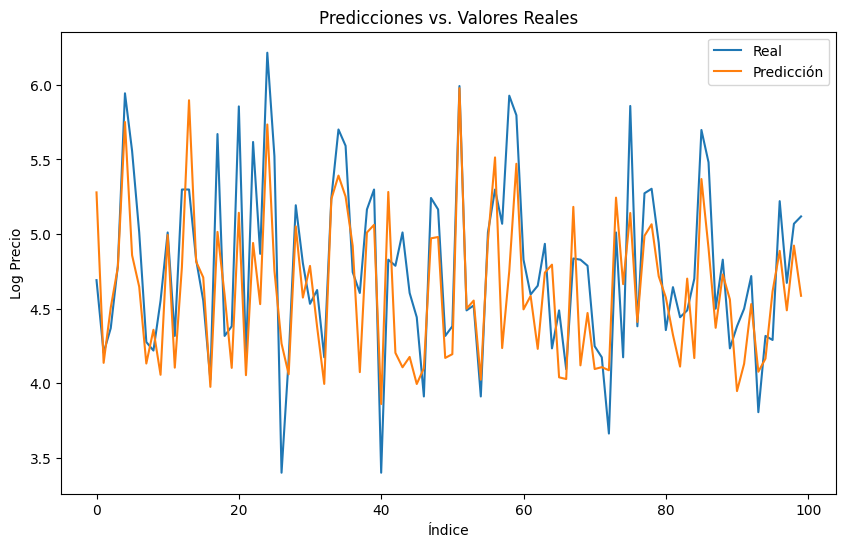

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = best_model.evaluate([X_test_tab, X_test_img], y_test)
print(f"Test loss: {test_loss}, Test MAE: {test_mae}")

# Realizar predicciones
y_pred = best_model.predict([X_test_tab, X_test_img])

# Comparar algunas predicciones con los valores reales
for i in range(10):
    print(f"Predicción: {y_pred[i][0]}, Real: {y_test[i]}")

# Calcular métricas de evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Graficar las primeras 100 predicciones frente a los valores reales
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Real')
plt.plot(y_pred[:100], label='Predicción')
plt.legend()
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Log Precio')
plt.show()


In [ ]:
# Utilizar los mejores hiperparámetros para entrenar el modelo
best_units_tab_1 = 512
best_units_tab_2 = 384
best_units_img_1 = 192
best_units_img_2 = 384
best_units_combined_1 = 384

# Crear el modelo con los mejores hiperparámetros
def build_model_with_best_hyperparameters():
    # Modelo 1D/tabular
    input_tab = Input(shape=(X_train_tab.shape[1],))
    x = Dense(best_units_tab_1, activation='relu')(input_tab)
    x = Dropout(0.5)(x)
    x = Dense(best_units_tab_2, activation='relu')(x)
    x = Dropout(0.5)(x)
    model_tab = Model(inputs=input_tab, outputs=x)

    # Modelo 2D/imagen
    input_img = Input(shape=(224, 224, 3))
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_img)
    y = GlobalAveragePooling2D()(base_model.output)
    y = Dense(best_units_img_1, activation='relu')(y)
    y = Dropout(0.5)(y)
    y = Dense(best_units_img_2, activation='relu')(y)
    y = Dropout(0.5)(y)
    model_img = Model(inputs=base_model.input, outputs=y)

    # Combinar ambos modelos
    combined = concatenate([model_tab.output, model_img.output])
    z = Dense(best_units_combined_1, activation='relu')(combined)
    z = Dropout(0.5)(z)
    z = Dense(1, activation='linear')(z)

    model = Model(inputs=[model_tab.input, model_img.input], outputs=z)
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

    return model

model = build_model_with_best_hyperparameters()
history = model.fit(
    [X_train_tab, X_train_img], y_train,
    validation_data=([X_test_tab, X_test_img], y_test),
    epochs=50,
    batch_size=32
)

# Guardar el modelo entrenado
model.save("/content/drive/My Drive/Colab Deep/airbnb_price_prediction_model_final.h5")

print("Modelo entrenado y guardado con los mejores hiperparámetros.")


Epoch 1/50
50/50 [==============================] - 46s 372ms/step - loss: 33.5404 - mae: 4.0534 - val_loss: 55994.8359 - val_mae: 236.6015
Epoch 2/50
50/50 [==============================] - 18s 352ms/step - loss: 5.5333 - mae: 1.8278 - val_loss: 7.9547 - val_mae: 2.7389
Epoch 3/50
50/50 [==============================] - 18s 365ms/step - loss: 3.2883 - mae: 1.3931 - val_loss: 12.1915 - val_mae: 3.4290
Epoch 4/50
50/50 [==============================] - 18s 358ms/step - loss: 2.3749 - mae: 1.2099 - val_loss: 12.7421 - val_mae: 3.5089
Epoch 5/50
50/50 [==============================] - 18s 351ms/step - loss: 1.8456 - mae: 1.0757 - val_loss: 13.1995 - val_mae: 3.5751
Epoch 6/50
50/50 [==============================] - 17s 350ms/step - loss: 1.5743 - mae: 0.9815 - val_loss: 13.0233 - val_mae: 3.5507
Epoch 7/50
50/50 [==============================] - 18s 354ms/step - loss: 1.4878 - mae: 0.9632 - val_loss: 11.5283 - val_mae: 3.3337
Epoch 8/50
50/50 [==============================] - 18s 3

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo entrenado y guardado con los mejores hiperparámetros.


In [ ]:
# Crear los embeddings usando los mejores modelos 1D y 2D
embedding_1D_train = model_tab.predict(X_train_tab)
embedding_2D_train = model_img.predict(X_train_img)
embedding_1D_test = model_tab.predict(X_test_tab)
embedding_2D_test = model_img.predict(X_test_img)

# Combinar los embeddings
combined_train = np.concatenate([embedding_1D_train, embedding_2D_train], axis=1)
combined_test = np.concatenate([embedding_1D_test, embedding_2D_test], axis=1)

# Crear el modelo de early fusion
input_combined = Input(shape=(combined_train.shape[1],))
z = Dense(128, activation='relu')(input_combined)
z = Dropout(0.5)(z)
z = Dense(1, activation='linear')(z)

model_early_fusion = Model(inputs=input_combined, outputs=z)
model_early_fusion.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo de early fusion
history_early_fusion = model_early_fusion.fit(
    combined_train, y_train,
    validation_data=(combined_test, y_test),
    epochs=50,
    batch_size=32
)

# Guardar el modelo de early fusion
model_early_fusion.save("/content/drive/My Drive/Colab Deep/airbnb_price_prediction_early_fusion.h5")

print("Modelo de early fusion entrenado y guardado.")


13/13 [==============================] - 2s 88ms/step
Epoch 1/50
50/50 [==============================] - 1s 5ms/step - loss: 14.3671 - mae: 3.7219 - val_loss: 8.9163 - val_mae: 2.8962
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 4.5828 - mae: 1.9848 - val_loss: 2.2660 - val_mae: 1.2576
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 1.3322 - mae: 0.9622 - val_loss: 1.1622 - val_mae: 0.8373
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 1.1200 - mae: 0.8559 - val_loss: 1.1055 - val_mae: 0.8174
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 1.1539 - mae: 0.8654 - val_loss: 1.0692 - val_mae: 0.8025
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 1.0346 - mae: 0.8022 - val_loss: 1.0264 - val_mae: 0.7859
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.9745 - mae: 0.7815 - val_loss: 0.9754 - val_mae: 0.7672
Epoch 8/50
50/50 [=================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.linear_model import LinearRegression

# Obtener las predicciones de los modelos 1D y 2D
predictions_1D_train = model_tab.predict(X_train_tab)
predictions_2D_train = model_img.predict(X_train_img)
predictions_1D_test = model_tab.predict(X_test_tab)
predictions_2D_test = model_img.predict(X_test_img)

# Combinar las predicciones
combined_predictions_train = np.concatenate([predictions_1D_train, predictions_2D_train], axis=1)
combined_predictions_test = np.concatenate([predictions_1D_test, predictions_2D_test], axis=1)

# Entrenar el modelo de late fusion
late_fusion_model = LinearRegression()
late_fusion_model.fit(combined_predictions_train, y_train)

# Hacer predicciones con el modelo de late fusion
y_pred_late_fusion = late_fusion_model.predict(combined_predictions_test)

# Evaluar el modelo de late fusion
mae_late_fusion = mean_absolute_error(y_test, y_pred_late_fusion)
mse_late_fusion = mean_squared_error(y_test, y_pred_late_fusion)
r2_late_fusion = r2_score(y_test, y_pred_late_fusion)

print(f"Mean Absolute Error (MAE) Late Fusion: {mae_late_fusion}")
print(f"Mean Squared Error (MSE) Late Fusion: {mse_late_fusion}")
print(f"R-squared (R²) Late Fusion: {r2_late_fusion}")

# Guardar el modelo de late fusion
import pickle
with open("/content/drive/My Drive/Colab Deep/late_fusion_model.pkl", "wb") as f:
    pickle.dump(late_fusion_model, f)

print("Modelo de late fusion entrenado y guardado.")


13/13 [==============================] - 1s 87ms/step
Mean Absolute Error (MAE) Late Fusion: 0.5529996156692505
Mean Squared Error (MSE) Late Fusion: 0.5123166441917419
R-squared (R²) Late Fusion: -0.21649703392619069
Modelo de late fusion entrenado y guardado.


13/13 [==============================] - 0s 1ms/step
Modelo Tabular:
  MAE: 4.764005661010742
  MSE: 23.11722183227539
  R2: -53.89189576662218

Modelo de Imágenes:
  MAE: 6.216814041137695
  MSE: 39.263729095458984
  R2: -92.23181187350184

Early Fusion:
  MAE: 0.5497751832008362
  MSE: 0.5246903896331787
  R2: -0.24587839599315964

Late Fusion:
  MAE: 0.5529996156692505
  MSE: 0.5123166441917419
  R2: -0.21649703392619069



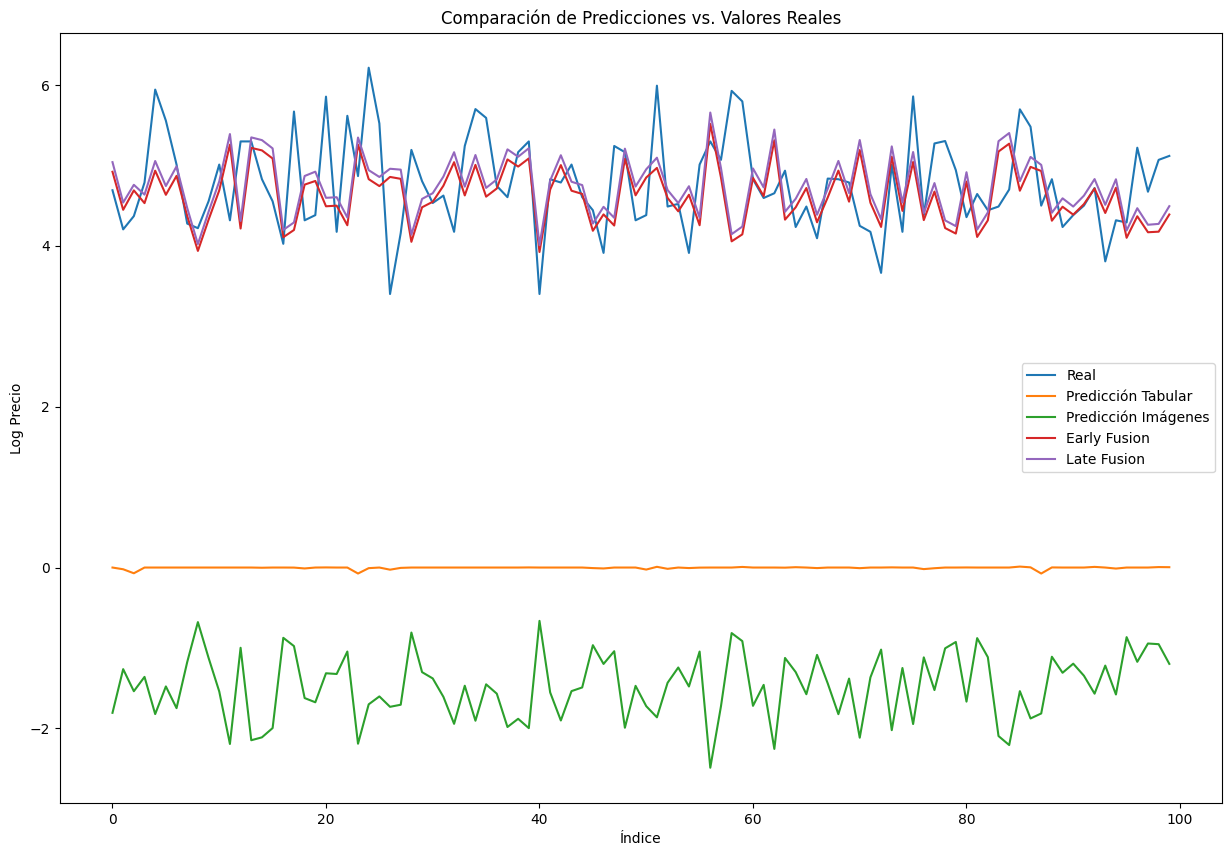

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para evaluar y comparar modelos
def evaluate_models(y_test, y_pred_tab, y_pred_img, y_pred_early, y_pred_late):
    # Calcular métricas para cada modelo
    metrics = {
        "Modelo Tabular": {
            "MAE": mean_absolute_error(y_test, y_pred_tab),
            "MSE": mean_squared_error(y_test, y_pred_tab),
            "R2": r2_score(y_test, y_pred_tab)
        },
        "Modelo de Imágenes": {
            "MAE": mean_absolute_error(y_test, y_pred_img),
            "MSE": mean_squared_error(y_test, y_pred_img),
            "R2": r2_score(y_test, y_pred_img)
        },
        "Early Fusion": {
            "MAE": mean_absolute_error(y_test, y_pred_early),
            "MSE": mean_squared_error(y_test, y_pred_early),
            "R2": r2_score(y_test, y_pred_early)
        },
        "Late Fusion": {
            "MAE": mean_absolute_error(y_test, y_pred_late),
            "MSE": mean_squared_error(y_test, y_pred_late),
            "R2": r2_score(y_test, y_pred_late)
        }
    }

    # Imprimir métricas
    for model, metrics in metrics.items():
        print(f"{model}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")
        print()

    # Graficar predicciones vs. valores reales
    plt.figure(figsize=(15, 10))
    plt.plot(y_test[:100], label='Real')
    plt.plot(y_pred_tab[:100], label='Predicción Tabular')
    plt.plot(y_pred_img[:100], label='Predicción Imágenes')
    plt.plot(y_pred_early[:100], label='Early Fusion')
    plt.plot(y_pred_late[:100], label='Late Fusion')
    plt.legend()
    plt.title('Comparación de Predicciones vs. Valores Reales')
    plt.xlabel('Índice')
    plt.ylabel('Log Precio')
    plt.show()

# Obtener predicciones de cada modelo
y_pred_tab = model_tab.predict(X_test_tab)
y_pred_img = model_img.predict(X_test_img)
y_pred_early = model_early_fusion.predict(combined_test)
y_pred_late = late_fusion_model.predict(combined_predictions_test)

# Evaluar y comparar los modelos
evaluate_models(y_test, y_pred_tab, y_pred_img, y_pred_early, y_pred_late)


In [ ]:
# Optimización de Hiperparámetros usando Keras Tuner
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
import tensorflow as tf

# Definir una función de construcción del modelo para Keras Tuner
def build_model(hp):
    input_tab = Input(shape=(X_train_tab.shape[1],))
    x = Dense(hp.Int('units_tab_1', min_value=32, max_value=512, step=32), activation='relu')(input_tab)
    x = Dropout(0.5)(x)
    x = Dense(hp.Int('units_tab_2', min_value=32, max_value=512, step=32), activation='relu')(x)
    x = Dropout(0.5)(x)
    model_tab = Model(inputs=input_tab, outputs=x)

    input_img = Input(shape=(224, 224, 3))
    y = ResNet50(weights='imagenet', include_top=False, input_tensor=input_img)
    y = GlobalAveragePooling2D()(y.output)
    y = Dense(hp.Int('units_img_1', min_value=32, max_value=512, step=32), activation='relu', kernel_regularizer=l2(0.01))(y)
    y = Dropout(0.5)(y)
    y = Dense(hp.Int('units_img_2', min_value=32, max_value=512, step=32), activation='relu', kernel_regularizer=l2(0.01))(y)
    y = Dropout(0.5)(y)
    model_img = Model(inputs=input_img, outputs=y)

    combined = tf.keras.layers.concatenate([model_tab.output, model_img.output])
    z = Dense(hp.Int('units_combined_1', min_value=32, max_value=512, step=32), activation='relu', kernel_regularizer=l2(0.01))(combined)
    z = Dropout(0.5)(z)
    z = Dense(1, activation='linear')(z)

    model = Model(inputs=[model_tab.input, model_img.input], outputs=z)
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

    return model

# Configurar el Keras Tuner
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='airbnb_price_prediction'
)

# Iniciar la búsqueda de hiperparámetros
tuner.search([X_train_tab, X_train_img], y_train, epochs=10, validation_data=([X_test_tab, X_test_img], y_test))

# Mostrar los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Mejores Hiperparámetros: {best_hps.values}")

# Entrenar el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)
history = model.fit([X_train_tab, X_train_img], y_train, epochs=50, validation_data=([X_test_tab, X_test_img], y_test))

# Guardar el modelo entrenado
model.save("/content/drive/My Drive/Colab Deep/airbnb_price_prediction_model_optimized.h5")
print("Modelo optimizado entrenado y guardado.")


Trial 10 Complete [00h 03m 35s]
val_mae: 1.9323701858520508

Best val_mae So Far: 0.4371626377105713
Total elapsed time: 01h 29m 00s
Mejores Hiperparámetros: {'units_tab_1': 512, 'units_tab_2': 384, 'units_img_1': 192, 'units_img_2': 384, 'units_combined_1': 384}
Epoch 1/50
50/50 [==============================] - 46s 378ms/step - loss: 39.1418 - mae: 3.7785 - val_loss: 18.0015 - val_mae: 2.6753
Epoch 2/50
50/50 [==============================] - 18s 361ms/step - loss: 14.7410 - mae: 1.6876 - val_loss: 17.0355 - val_mae: 2.6453
Epoch 3/50
50/50 [==============================] - 18s 361ms/step - loss: 12.1287 - mae: 1.3019 - val_loss: 20.4884 - val_mae: 3.3273
Epoch 4/50
50/50 [==============================] - 18s 352ms/step - loss: 10.8820 - mae: 1.1606 - val_loss: 18.8345 - val_mae: 3.1637
Epoch 5/50
50/50 [==============================] - 17s 349ms/step - loss: 10.1717 - mae: 1.1271 - val_loss: 16.5669 - val_mae: 2.8727
Epoch 6/50
50/50 [==============================] - 18s 351ms

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo optimizado entrenado y guardado.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, concatenate
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(data_text, data['log_price'].values, test_size=0.2, random_state=42)

# Definir el modelo de texto
input_text = Input(shape=(max_sequence_length,), dtype='int32', name='text_input')
embedding_layer = Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_sequence_length)(input_text)
lstm_layer = LSTM(64)(embedding_layer)
model_text = Model(inputs=input_text, outputs=lstm_layer)

# Redefinir los modelos tabular e imagen
input_tab = Input(shape=(X_train_tab.shape[1],))
x_tab = Dense(64, activation='relu')(input_tab)
x_tab = Dropout(0.5)(x_tab)
x_tab = Dense(32, activation='relu')(x_tab)
x_tab = Dropout(0.5)(x_tab)
model_tab = Model(inputs=input_tab, outputs=x_tab)

input_img = Input(shape=(224, 224, 3))
y_img = ResNet50(weights='imagenet', include_top=False, input_tensor=input_img)
y_img = GlobalAveragePooling2D()(y_img.output)
y_img = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(y_img)
y_img = Dropout(0.5)(y_img)
y_img = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(y_img)
y_img = Dropout(0.5)(y_img)
model_img = Model(inputs=input_img, outputs=y_img)

# Combinar los tres modelos
combined = concatenate([model_tab.output, model_img.output, model_text.output])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.5)(z)
z = Dense(1, activation='linear')(z)

# Definir y compilar el modelo combinado
model_combined = Model(inputs=[input_tab, input_img, input_text], outputs=z)
model_combined.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo con un tamaño de lote más pequeño
history_combined = model_combined.fit(
    [X_train_tab, X_train_img, X_train_text], y_train,
    validation_data=([X_test_tab, X_test_img, X_test_text], y_test),
    epochs=50, batch_size=8
)

# Evaluar el modelo
test_loss_combined = model_combined.evaluate([X_test_tab, X_test_img, X_test_text], y_test)
print(f"Test loss (combined): {test_loss_combined}")

# Guardar el modelo combinado
model_combined.save("/content/drive/My Drive/Colab Deep/airbnb_price_prediction_combined_model.h5")



Epoch 1/50
200/200 [==============================] - 57s 124ms/step - loss: 44.2576 - mae: 3.9320 - val_loss: 10.1028 - val_mae: 1.6082
Epoch 2/50
200/200 [==============================] - 22s 112ms/step - loss: 11.0170 - mae: 1.6224 - val_loss: 9.5151 - val_mae: 1.8267
Epoch 3/50
200/200 [==============================] - 23s 114ms/step - loss: 7.9829 - mae: 1.2838 - val_loss: 7.2850 - val_mae: 1.4541
Epoch 4/50
200/200 [==============================] - 23s 115ms/step - loss: 6.6806 - mae: 1.1534 - val_loss: 4.6465 - val_mae: 0.6378
Epoch 5/50
200/200 [==============================] - 23s 116ms/step - loss: 5.2913 - mae: 1.0204 - val_loss: 3.8098 - val_mae: 0.5626
Epoch 6/50
200/200 [==============================] - 23s 115ms/step - loss: 4.5364 - mae: 0.9769 - val_loss: 3.1610 - val_mae: 0.5056
Epoch 7/50
200/200 [==============================] - 23s 115ms/step - loss: 3.9011 - mae: 0.9192 - val_loss: 2.8347 - val_mae: 0.5826
Epoch 8/50
200/200 [==============================] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import gc

# Definir el modelo combinado
model_combined = Model(inputs=[input_tab, input_img, input_text], outputs=z)
model_combined.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo con un tamaño de lote más pequeño
history_combined = model_combined.fit(
    [X_train_tab, X_train_img, X_train_text], y_train,
    validation_data=([X_test_tab, X_test_img, X_test_text], y_test),
    epochs=50, batch_size=16
)

# Liberar memoria
del X_train_tab, X_train_img, X_train_text, y_train
gc.collect()

# Evaluar el modelo
test_loss_combined = model_combined.evaluate([X_test_tab, X_test_img, X_test_text], y_test)
print(f"Test loss (combined): {test_loss_combined}")

# Guardar el modelo combinado
model_combined.save("/content/drive/My Drive/Colab Deep/airbnb_price_prediction_combined_model.h5")


Epoch 1/50
100/100 [==============================] - 51s 205ms/step - loss: 0.1823 - mae: 0.3239 - val_loss: 0.5727 - val_mae: 0.6083
Epoch 2/50
100/100 [==============================] - 19s 188ms/step - loss: 0.1701 - mae: 0.3156 - val_loss: 1900.4385 - val_mae: 26.0116
Epoch 3/50
100/100 [==============================] - 19s 191ms/step - loss: 0.1550 - mae: 0.3037 - val_loss: 0.5238 - val_mae: 0.5754
Epoch 4/50
100/100 [==============================] - 19s 191ms/step - loss: 0.1603 - mae: 0.3020 - val_loss: 0.5854 - val_mae: 0.6147
Epoch 5/50
100/100 [==============================] - 19s 189ms/step - loss: 0.1412 - mae: 0.2827 - val_loss: 0.5442 - val_mae: 0.5908
Epoch 6/50
100/100 [==============================] - 19s 188ms/step - loss: 0.1322 - mae: 0.2822 - val_loss: 0.5627 - val_mae: 0.5992
Epoch 7/50
100/100 [==============================] - 19s 189ms/step - loss: 0.1243 - mae: 0.2673 - val_loss: 0.5517 - val_mae: 0.5937
Epoch 8/50
100/100 [==============================]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 2s 88ms/step


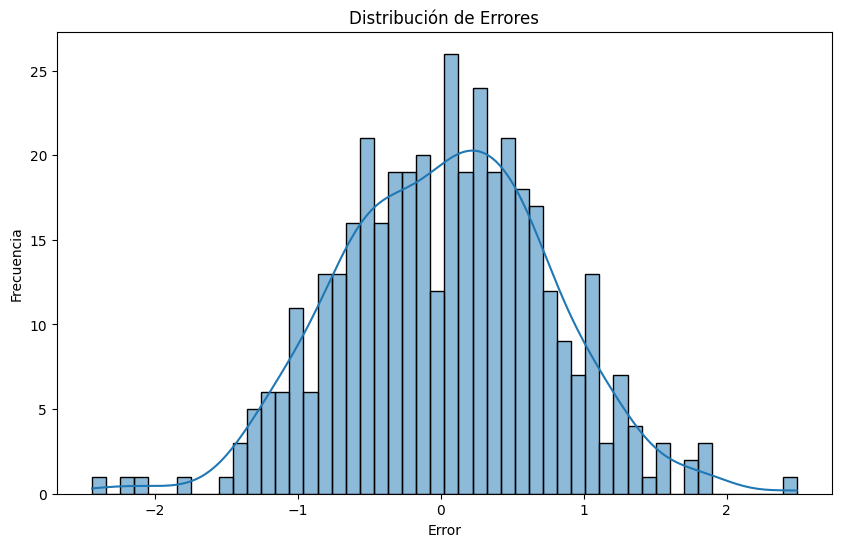

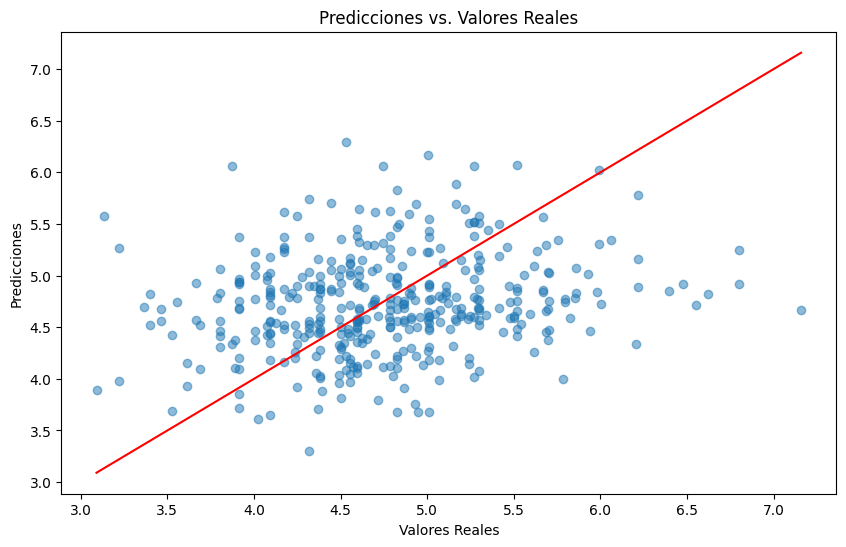

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar predicciones con el modelo combinado
y_pred_combined = model_combined.predict([X_test_tab, X_test_img, X_test_text])

# Calcular los errores
errors = y_test - y_pred_combined.flatten()

# Graficar los errores
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Distribución de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_combined, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En estos pasos tuve muchos problemas // aqui iniciamos con el texto :)

In [84]:
import pandas as pd
import numpy as np
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import load_img, img_to_array

# Cargar los datos completos
data = pd.read_excel('/content/drive/My Drive/Colab Deep/data_complete.xlsx')

# Listar los archivos en la carpeta de imágenes
image_folder = '/content/drive/My Drive/Colab Deep/images'
images = os.listdir(image_folder)

# Obtener los IDs de las imágenes disponibles
image_ids = [int(img.split('_')[1].split('.')[0]) for img in images]

# Crear una nueva columna en el DataFrame que contenga los nombres de las imágenes
data['image_name'] = data.index.map(lambda x: f'image_{x}.jpg' if x in image_ids else np.nan)

# Filtrar el DataFrame para mantener solo las filas que tienen imágenes correspondientes
data_filtered = data.dropna(subset=['image_name']).reset_index(drop=True)

# Verificar las dimensiones después del filtrado
print(f"Dimensiones del DataFrame filtrado: {data_filtered.shape}")

# Guardar el DataFrame filtrado en un nuevo archivo CSV
data_filtered.to_csv("/content/drive/My Drive/Colab Deep/data_filtered.csv", index=False)

# Verificar los primeros registros del DataFrame filtrado
print(data_filtered.head())


Dimensiones del DataFrame filtrado: (2000, 30)
         id  log_price property_type        room_type  \
0   6304928   5.129899     Apartment  Entire home/apt   
1  12422935   4.442651     Apartment     Private room   
2  13971273   4.787492   Condominium  Entire home/apt   
3    180792   4.787492         House     Private room   
4   5578513   4.605170     Apartment     Private room   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
1  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   
2  {TV,"Cable TV","Wireless Internet","Wheelchair...             2        1.0   
3  {TV,"Cable TV","Wireless Internet","Pets live ...             2        1.0   
4  {Internet,"Wireless Internet","Air conditionin...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   longitude  \
0  Real Bed              strict          True  ...  -73.9

In [85]:
# Seleccionar columnas que suman valor al modelo
selected_columns = ['log_price', 'property_type', 'room_type', 'bed_type',
                    'cancellation_policy', 'accommodates', 'bathrooms',
                    'cleaning_fee', 'description', 'number_of_reviews',
                    'review_scores_rating', 'bedrooms', 'beds', 'image_name']

# Crear nuevo DataFrame con columnas seleccionadas
data_filtered = data_filtered[selected_columns]

# Convertir columnas numéricas a float
numerical_columns = ['log_price', 'accommodates', 'bathrooms', 'cleaning_fee',
                     'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']
data_filtered[numerical_columns] = data_filtered[numerical_columns].astype(float)

# Aplicar one-hot encoding a las columnas categóricas
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
data_filtered = pd.get_dummies(data_filtered, columns=categorical_columns)


<ipython-input-85-894e6242ac1c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[numerical_columns] = data_filtered[numerical_columns].astype(float)


In [86]:
# Preparar datos de texto
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data_filtered['description'])
sequences = tokenizer.texts_to_sequences(data_filtered['description'])
max_sequence_length = 100
data_text = pad_sequences(sequences, maxlen=max_sequence_length)


In [87]:
# Preparar datos de imágenes
image_data = []
for img_name in data_filtered['image_name']:
    img = load_img(os.path.join(image_folder, img_name), target_size=(224, 224))
    img_array = img_to_array(img)
    image_data.append(img_array)

# Convertir la lista de imágenes a un array numpy
image_data = np.array(image_data)


In [88]:
from sklearn.model_selection import train_test_split

# Dividir datos tabulares
X_tabular = data_filtered.drop(columns=['log_price', 'image_name', 'description'])
y = data_filtered['log_price']

# Dividir datos en entrenamiento y prueba
X_train_tab, X_test_tab, X_train_text, X_test_text, X_train_img, X_test_img, y_train, y_test = train_test_split(
    X_tabular, data_text, image_data, y, test_size=0.2, random_state=42)

# Convertir los datos a numpy arrays
X_train_tab = np.array(X_train_tab).astype(np.float32)
X_test_tab = np.array(X_test_tab).astype(np.float32)
X_train_text = np.array(X_train_text).astype(np.float32)
X_test_text = np.array(X_test_text).astype(np.float32)
X_train_img = np.array(X_train_img).astype(np.float32)
X_test_img = np.array(X_test_img).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

print("Shapes de los datos:")
print(f"X_train_tab: {X_train_tab.shape}")
print(f"X_test_tab: {X_test_tab.shape}")
print(f"X_train_text: {X_train_text.shape}")
print(f"X_test_text: {X_test_text.shape}")
print(f"X_train_img: {X_train_img.shape}")
print(f"X_test_img: {X_test_img.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Shapes de los datos:
X_train_tab: (1600, 38)
X_test_tab: (400, 38)
X_train_text: (1600, 100)
X_test_text: (400, 100)
X_train_img: (1600, 224, 224, 3)
X_test_img: (400, 224, 224, 3)
y_train: (1600,)
y_test: (400,)


In [89]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, concatenate, LSTM, Embedding, GlobalAveragePooling2D
from keras.applications import ResNet50

# Definir entradas
input_tab = Input(shape=(X_train_tab.shape[1],), name='tab_input')
input_img = Input(shape=(224, 224, 3), name='img_input')
input_text = Input(shape=(max_sequence_length,), name='text_input')

# Definir red tabular
x_tab = Dense(64, activation='relu')(input_tab)
x_tab = Dropout(0.5)(x_tab)

# Definir red de imágenes
base_model = ResNet50(include_top=False, input_tensor=input_img)
x_img = base_model.output
x_img = GlobalAveragePooling2D()(x_img)
x_img = Dense(128, activation='relu')(x_img)
x_img = Dropout(0.5)(x_img)

# Definir red de texto
x_text = Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length)(input_text)
x_text = LSTM(128, return_sequences=False)(x_text)
x_text = Dropout(0.5)(x_text)

# Combinar redes
combined = concatenate([x_tab, x_img, x_text])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.5)(z)
z = Dense(1)(z)

# Definir y compilar el modelo
model_combined = Model(inputs=[input_tab, input_img, input_text], outputs=z)
model_combined.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
history_combined = model_combined.fit(
    [X_train_tab, X_train_img, X_train_text], y_train,
    validation_data=([X_test_tab, X_test_img, X_test_text], y_test),
    epochs=50, batch_size=16
)

# Evaluar el modelo
test_loss_combined = model_combined.evaluate([X_test_tab, X_test_img, X_test_text], y_test)
print(f"Test loss (combined): {test_loss_combined}")


Epoch 1/50
100/100 [==============================] - 52s 141ms/step - loss: 28.3150 - mae: 3.7073 - val_loss: 55.1127 - val_mae: 6.9771
Epoch 2/50
100/100 [==============================] - 10s 101ms/step - loss: 5.4105 - mae: 1.7258 - val_loss: 3.3150 - val_mae: 1.6839
Epoch 3/50
100/100 [==============================] - 10s 96ms/step - loss: 3.1085 - mae: 1.3194 - val_loss: 2.5182 - val_mae: 1.4535
Epoch 4/50
100/100 [==============================] - 9s 90ms/step - loss: 2.5674 - mae: 1.2283 - val_loss: 2.3248 - val_mae: 1.4046
Epoch 5/50
100/100 [==============================] - 9s 92ms/step - loss: 2.0926 - mae: 1.1352 - val_loss: 1.1085 - val_mae: 0.9033
Epoch 6/50
100/100 [==============================] - 9s 90ms/step - loss: 1.8953 - mae: 1.0698 - val_loss: 1.2015 - val_mae: 0.9496
Epoch 7/50
100/100 [==============================] - 9s 88ms/step - loss: 1.7559 - mae: 1.0361 - val_loss: 0.6951 - val_mae: 0.6788
Epoch 8/50
100/100 [==============================] - 9s 88ms/

13/13 [==============================] - 2s 51ms/step
Mean Absolute Error (MAE): 0.42958343029022217
Mean Squared Error (MSE): 0.2855997383594513
R-squared (R²): 0.32184277448477616


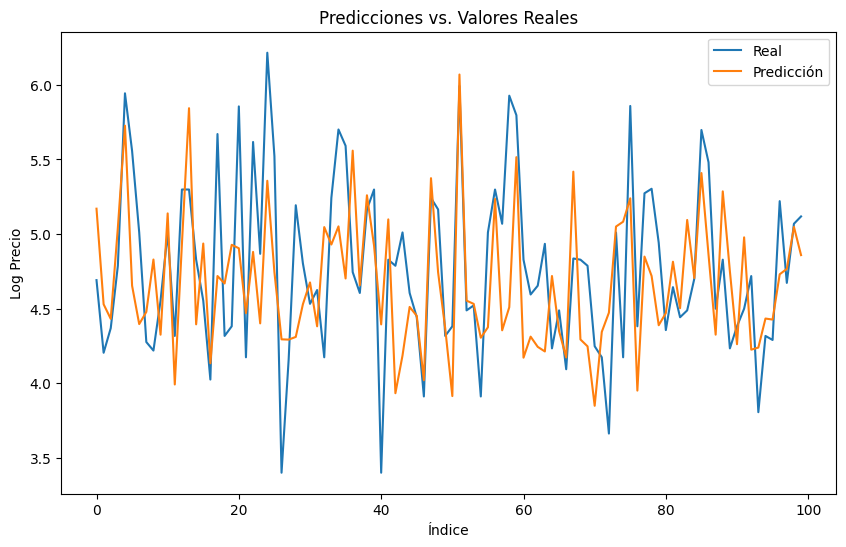

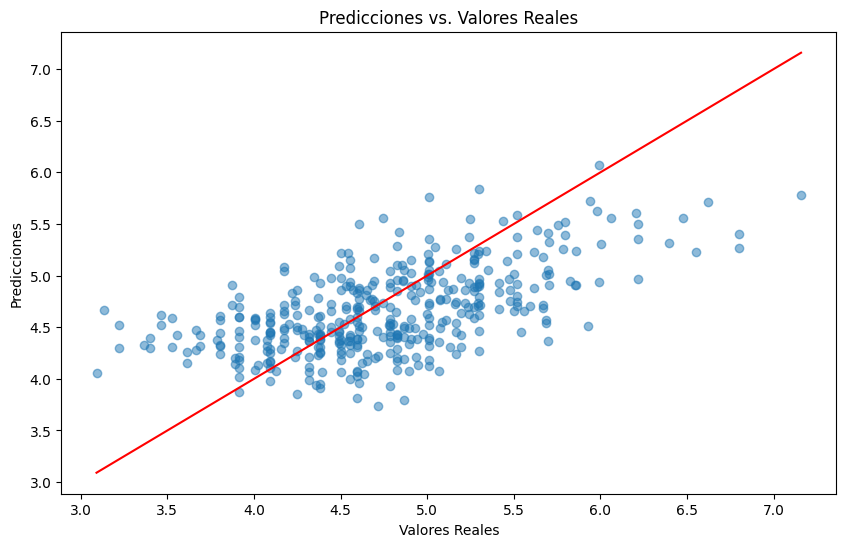

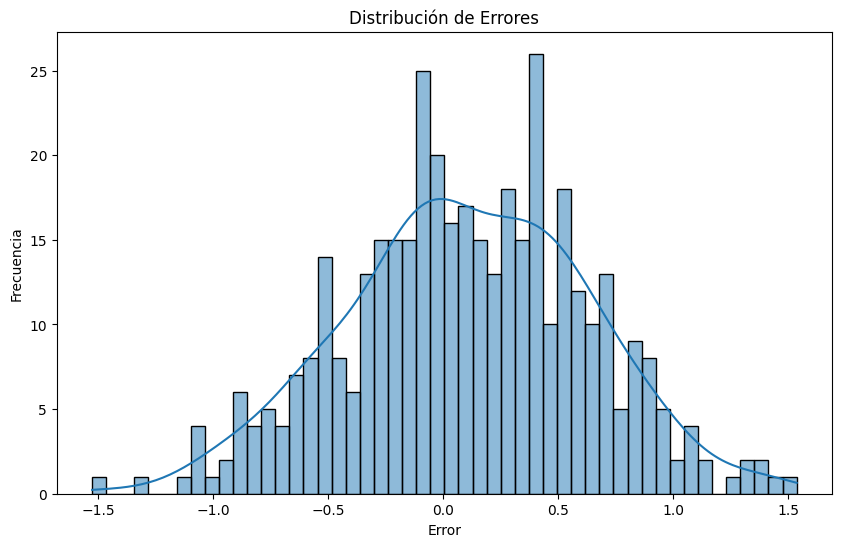

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Realizar predicciones con el modelo combinado
y_pred_combined = model_combined.predict([X_test_tab, X_test_img, X_test_text])

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred_combined)
mse = mean_squared_error(y_test, y_pred_combined)
r2 = r2_score(y_test, y_pred_combined)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Graficar las primeras 100 predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Real')
plt.plot(y_pred_combined[:100], label='Predicción')
plt.legend()
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Log Precio')
plt.show()

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_combined, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

# Graficar la distribución de los errores
errors = y_test - y_pred_combined.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Distribución de Errores')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()


In [91]:
# Guardar el modelo combinado
model_combined.save("/content/drive/My Drive/Colab Deep/airbnb_price_prediction_combined_model.h5")

# Guardar las predicciones
np.savetxt('/content/drive/My Drive/Colab Deep/predicciones.csv', y_pred_combined, delimiter=',')

# Guardar las métricas
with open('/content/drive/My Drive/Colab Deep/metricas.txt', 'w') as f:
    f.write(f"Mean Absolute Error (MAE): {mae}\n")
    f.write(f"Mean Squared Error (MSE): {mse}\n")
    f.write(f"R-squared (R²): {r2}\n")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
